In [1]:
import modules.io as io

In [2]:
DATA_KEY    = "TRAIN"
CONFIG_FILE = "./config/googlenet_c30_train300k_clean_point_small.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

162it [00:00, 28666.30it/s]
 24%|██▍       | 39/162 [00:00<00:00, 383.07it/s]

splitting size


100%|██████████| 162/162 [00:00<00:00, 377.41it/s]


In [4]:
import factories.model_factory as model_factory

model = model_factory.get(config)

/home/marsdenlab/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/marsdenlab/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/marsdenlab/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/marsdenlab/anaconda3/lib/python3.7/site-packages/tensorflow/pyth




pool 1 Tensor("googlenet/max_pool:0", shape=(?, 31, 31, 64), dtype=float32)
pool_2 Tensor("googlenet/max_pool_1:0", shape=(?, 15, 15, 192), dtype=float32)
pool 3 Tensor("googlenet/max_pool_2:0", shape=(?, 7, 7, 480), dtype=float32)
pool side Tensor("googlenet/inception_4e/concat:0", shape=(?, 7, 7, 833), dtype=float32)
[None, 6272]

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[None, 1024]
pool 5 Tensor("googlenet/inception_4e/concat:0", shape=(?, 7, 7, 833), dtype=float32)
pool final Tensor("googlenet/inception_5b/concat:0", shape=(?, 7, 7, 1024), dtype=float32)
[None, 50176]
[None, 1024]
Tensor("googlenet/output/Identity:0", shape=(?, 30), dtype=float32)
Tensor("googlenet/side_output/Identity:0", shape=(?, 30), dtype=float32)






In [5]:
import factories.preprocessor_factory as prepro_factory

preprocessor = prepro_factory.get(config)

In [6]:
import factories.trainer_factory as trainer_factory

trainer = trainer_factory.get(config)

trainer.setup_directories()

In [7]:
trainer.set_data(data, DATA_KEY)
trainer.set_preprocessor(preprocessor)

In [8]:
trainer.set_model(model)

(162, 64, 64)
(162, 64, 64, 1)
(162, 30)
0: loss=0.05312184989452362

yhat = [0.4905895  0.5092993  0.48706302 0.4818662  0.48809588 0.48877305
 0.48981652 0.48054296 0.47617844 0.48256946 0.47274384 0.4871948
 0.48342058 0.4780665  0.4674554  0.47958493 0.488323   0.48429194
 0.4800481  0.47526658 0.4809489  0.4788122  0.4803522  0.4787797
 0.4680436  0.4746306  0.47136307 0.4875121  0.48318747 0.48371446]


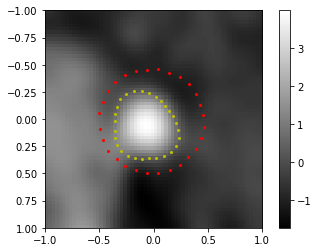

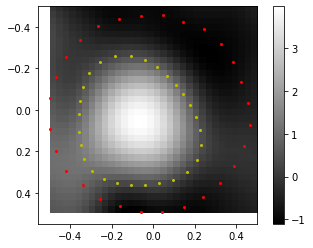

0: loss=0.020728394389152527

yhat = [0.4929476  0.505324   0.4885831  0.4876463  0.49272457 0.49030548
 0.495081   0.48490635 0.48335156 0.4837426  0.48254135 0.49052444
 0.48726162 0.48122254 0.47941604 0.48424217 0.48951697 0.4885098
 0.48084077 0.4845608  0.48729852 0.49014622 0.48210695 0.48294806
 0.47729284 0.48425895 0.47825485 0.49321082 0.48618698 0.48725548]


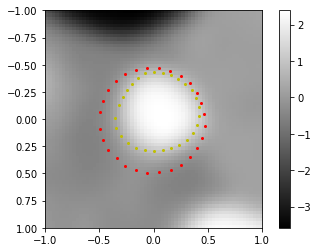

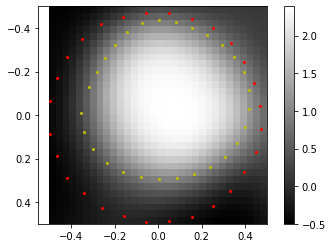

KeyboardInterrupt: 

In [9]:
trainer.train()

In [ ]:
trainer.save()